In [1]:
import networkx as nx
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

d:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# create graph London's underground
filename = 'london_tubenetwork.graphml'
G = nx.read_graphml(filename)

In [3]:
# London's underground information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 438
Number of edges: 486
Average degree:   2.2192


In [4]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [5]:
nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [6]:
# select 3 centrality measures
# degree betwenness closeness
# give the results for the first 10 ranked nodes for each of the 3 measures.
degs = dict(nx.degree(G))
bc = dict(nx.betweenness_centrality(G))
cc = dict(nx.closeness_centrality(G))

degs_sort = sorted(degs.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

In [7]:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [8]:
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)

# save node degree informations
df_sorted.to_csv('Degree Centrality.csv')

df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


In [9]:
pos = nx.get_node_attributes(G, 'coords')

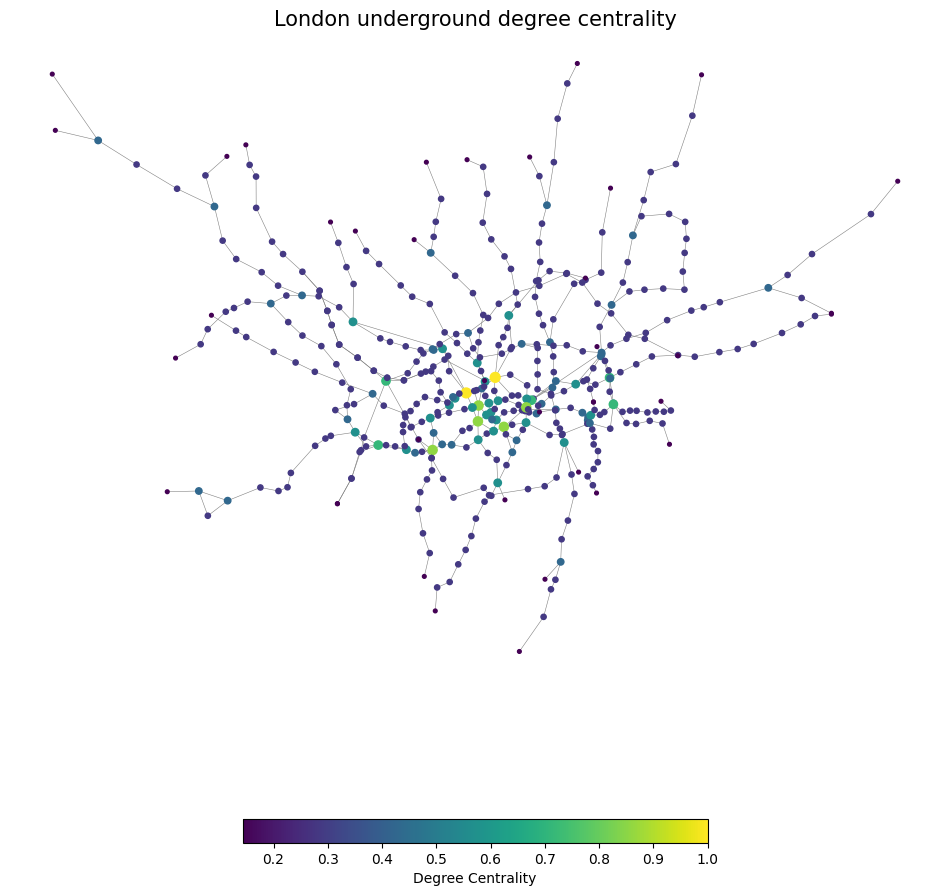

In [10]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

In [11]:
# betweenness centrality:
bet_london = nx.betweenness_centrality(G,normalized=False)
nx.set_node_attributes(G,bet_london,'betweenness')

In [12]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

# save node betweenness informations
df_sorted.to_csv('Betweenness Centrality.csv')

df_sorted[0:10]

,station_name,betweenness
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


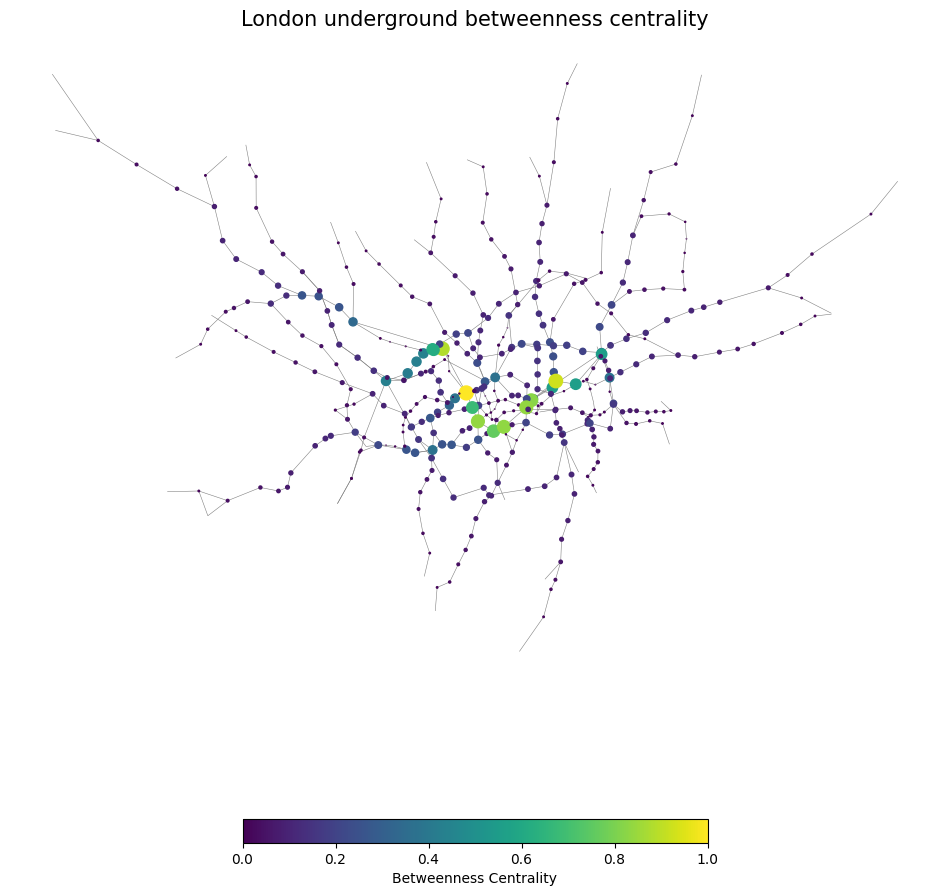

In [13]:
# Lets set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in G.nodes(data=True)]

# Plot graph
pos=pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground betweenness centrality",fontsize=15)
plt.show()

In [14]:
# closeness centrality: 
clos = nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos,'closeness')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

# save node closeness informations
df_sorted.to_csv('Closeness Centrality.csv')

df_sorted[0:10]

,station_name,closeness
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


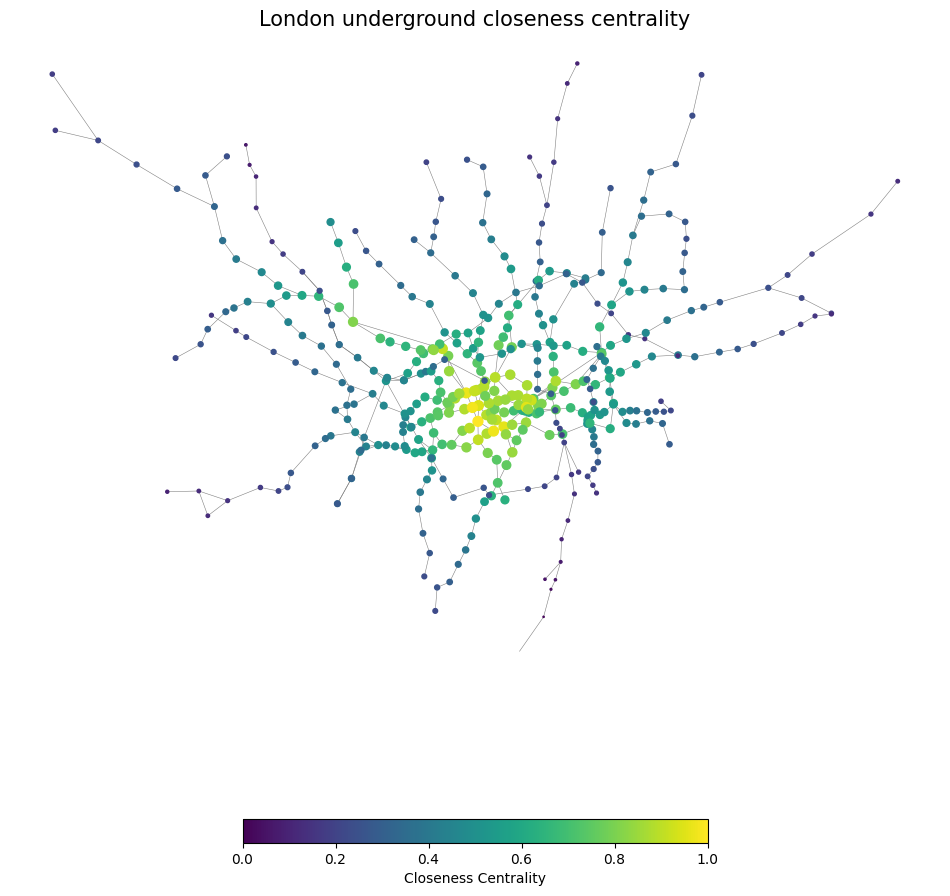

In [15]:
# Lets set color and width of nodes according to the closeness values

clos_val=[(i[1]['closeness']) for i in G.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in G.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground closeness centrality",fontsize=15)
plt.show()

In [16]:
# find 2 different measures to evaluate the impact of the node remove on the network.
# network efficiency
# the largest connected component
def cal_network_efficiency(G,N):

    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    d = nx.shortest_path_length(G, nodes[i], nodes[j])
                    e += 1/d
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))

    return E

def cal_largest_connected_component(G,N):

    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

    if len(nums):
        return nums[0] / N
    else:
        return 0


In [17]:
# node removal
# remove 10 nodes
def att_node(G1,nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for node in nodes_sort:

        G.remove_node(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n) 

    return res_con,res_eff

def show_node_attack(data1, data2, data3, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]
    x3 = [i for i in range(len(data3))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data1,label='Degree Centrality', marker='^')
    plt.plot(x2,data2,label='Betweenness Centrality', marker='<')
    plt.plot(x3,data3,label='Closeness Centrality', marker='>')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)


def att_node_sequential(G1,KKK,att_name):

    G = G1.copy()

    record_nodes = []

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for i in range(KKK):

        if att_name == 'DC':
            dicts = dict(nx.degree(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'CC':
            dicts = dict(nx.closeness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'BC':
            dicts = dict(nx.betweenness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        else:
            raise NameError('输入有误')

        node = nodes_sort[0]

        G.remove_node(node)
        record_nodes.append(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n)  




    return res_con,res_eff, record_nodes

In [18]:
def get_nodes_centrality(filename):
    '''
    get London's underground station centrality
    '''
    datas = pd.read_csv(filename, header=0, index_col=None)
    datas = np.array(datas)
    datas = datas.tolist()

    dicts = {}
    for data in datas:
        dicts[data[0]] = data[2]

    return dicts

In [19]:
dc = get_nodes_centrality("Degree Centrality.csv")
bc = get_nodes_centrality("Betweenness Centrality.csv")
cc = get_nodes_centrality("Closeness Centrality.csv")

In [21]:
dc_sort = sorted(dc.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

In [22]:
dc_sort_node = [k for k,v in dc_sort]
bc_sort_node = [k for k,v in bc_sort]
cc_sort_node = [k for k,v in cc_sort]

num_of_remove_nodes = 20

dc_con, dc_eff = att_node(G, dc_sort_node[:num_of_remove_nodes])
cc_con, cc_eff = att_node(G, cc_sort_node[:num_of_remove_nodes])
bc_con, bc_eff = att_node(G, bc_sort_node[:num_of_remove_nodes])

In [23]:
print(dc_eff[0])

0.08135196743399546


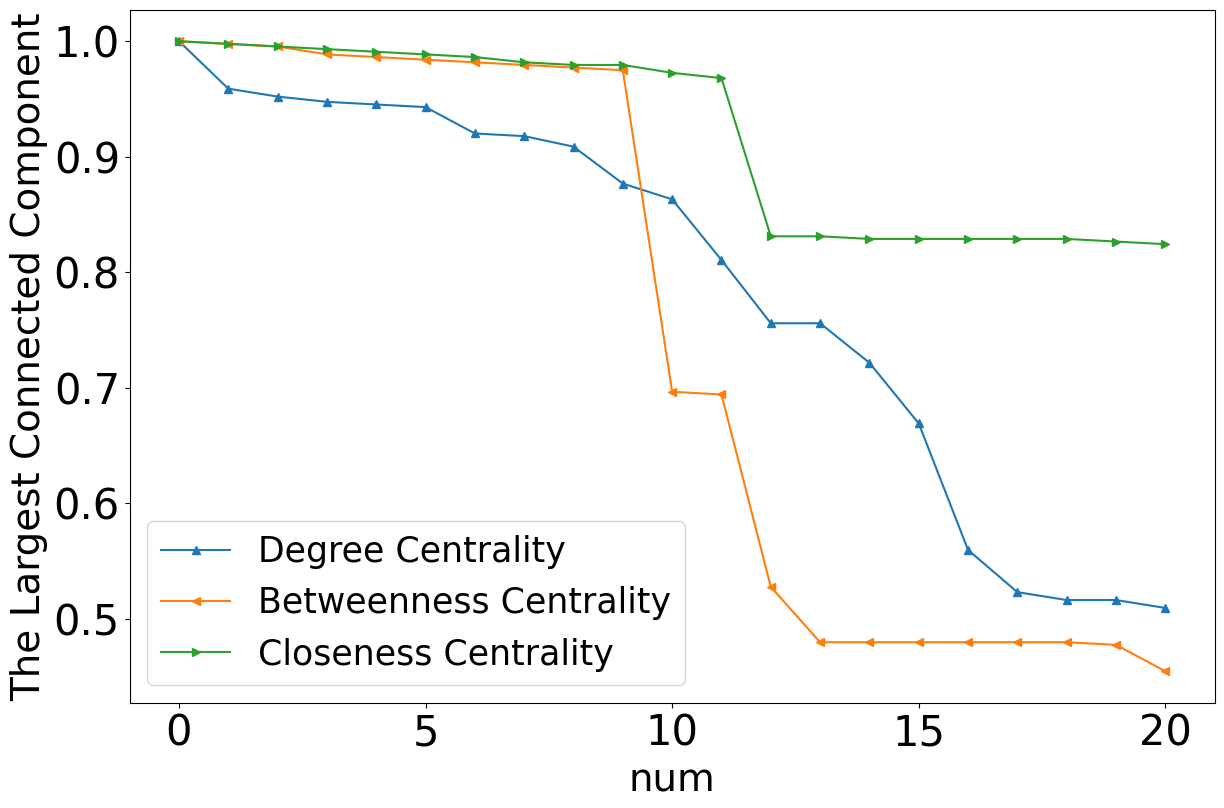

In [96]:
show_node_attack(dc_con, bc_con, cc_con, 'The Largest Connected Component', '001-The largest connected component.png')

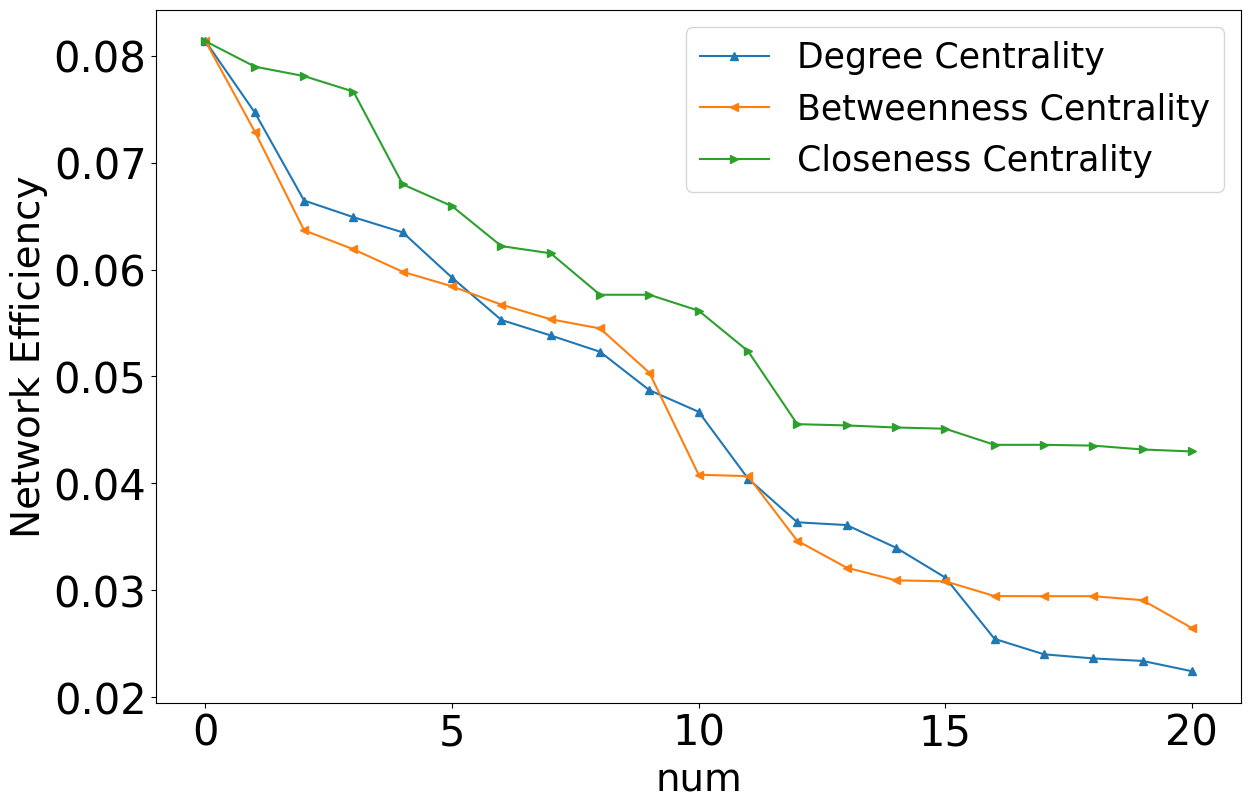

In [97]:
show_node_attack(dc_eff, bc_eff, cc_eff, 'Network Efficiency', '001-network efficiency.png')

In [24]:
se_dc_con, se_dc_eff, se_dc_nodes = att_node_sequential(G, num_of_remove_nodes,'DC')
print('度 攻击完成')

se_cc_con, se_cc_eff,se_cc_nodes = att_node_sequential(G, num_of_remove_nodes,'CC')
print('接近 攻击完成')

se_bc_con, se_bc_eff,se_bc_nodes = att_node_sequential(G, num_of_remove_nodes, "BC")
print('介数 攻击完成')

度 攻击完成
接近 攻击完成
介数 攻击完成


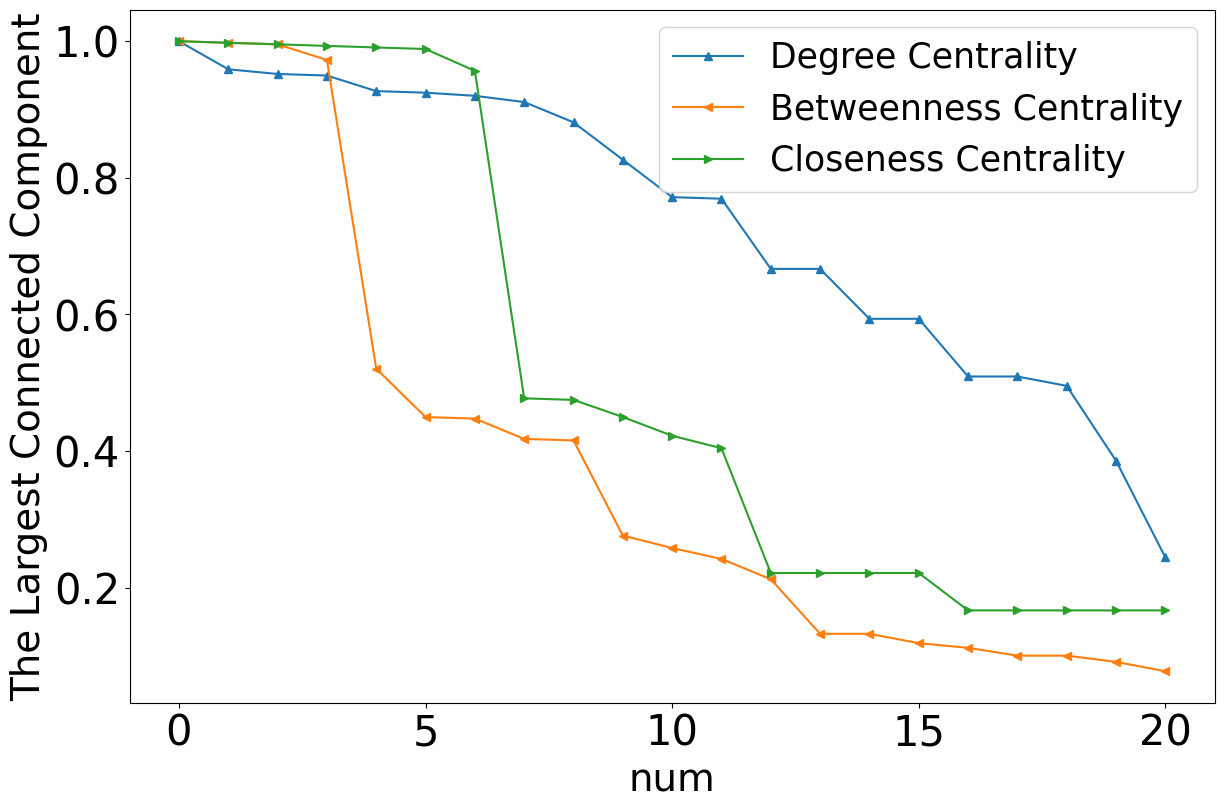

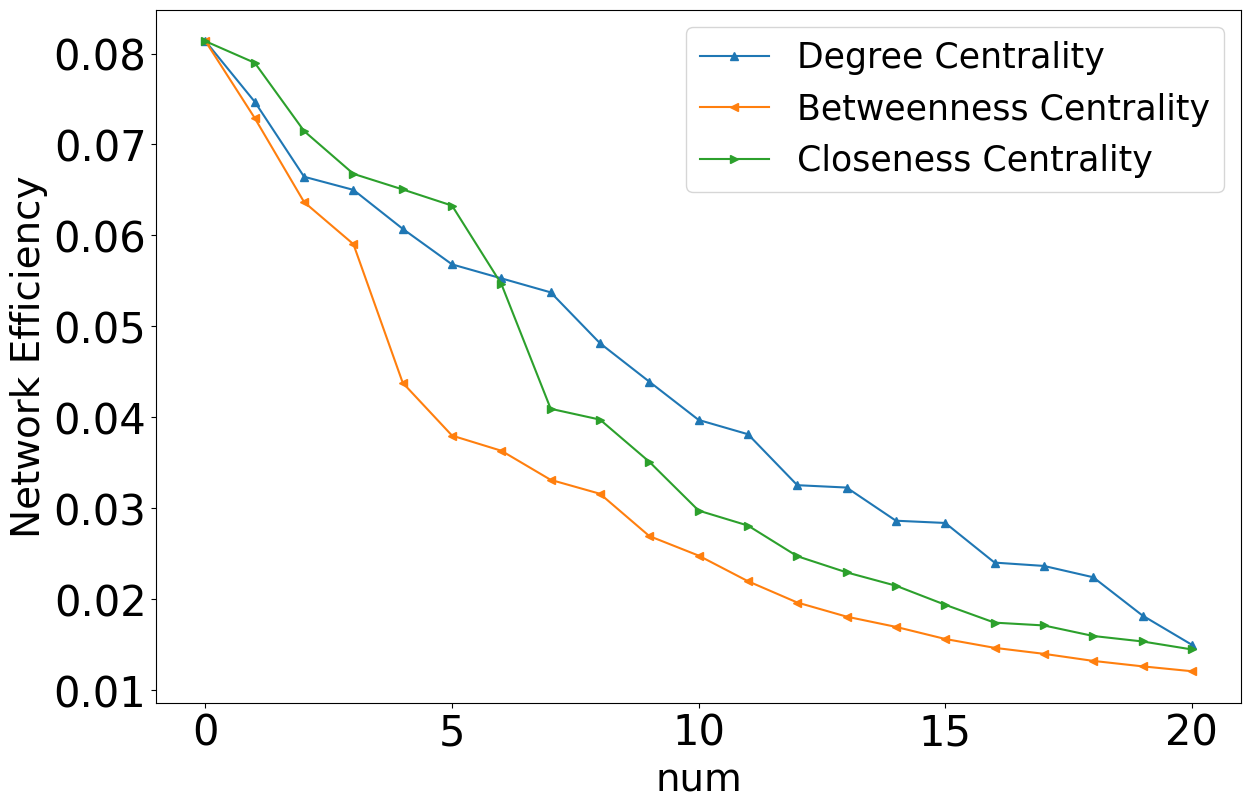

In [99]:
show_node_attack(se_dc_con, se_bc_con, se_cc_con, 'The Largest Connected Component', '002-The largest connected component.png')
show_node_attack(se_dc_eff, se_bc_eff, se_cc_eff, 'Network Efficiency', '002-network efficiency.png')

In [44]:
# 1.2 
# weight
filename = 'OD_matrix.csv'
datas = pd.read_csv(filename, index_col=0, header=None)
datas = np.array(datas)
datas = datas.tolist()

nodes = datas.pop(0)
nodes.pop()
datas.pop()
G1 = nx.Graph()

for i in range(len(datas)-1):
    for j in range(len(datas)-1):
        if i!=j and str(datas[i][j]) != '0':
            G1.add_edge(nodes[i], nodes[j], weight=float(datas[i][j]))

G1.add_nodes_from(nodes)

In [83]:
# 1.2.1

dc_g1 = dict(nx.degree(G1,weight='weight'))
bc_g1 = dict(nx.betweenness_centrality(G1,weight='weight'))
pr_g1 = dict(nx.pagerank(G1,weight='weight'))
cc_g1 = dict(nx.closeness_centrality(G1, distance='weight'))

dc_sort_g1 = sorted(dc_g1.items(), key=lambda x:-x[-1])
bc_sort_g1 = sorted(bc_g1.items(), key=lambda x:-x[-1])
pr_sort_g1 = sorted(pr_g1.items(), key=lambda x:-x[-1])
cc_sort_g1 = sorted(cc_g1.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g1.items():
    result.append([k, v, bc_g1[k], pr_g1[k], cc_g1[k]])

with open('node information weight.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

In [88]:
# unweight
dc_g2 = dict(nx.degree_centrality(G1))
bc_g2 = dict(nx.betweenness_centrality(G1))
pr_g2 = dict(nx.pagerank(G1,weight='None'))
cc_g2 = dict(nx.closeness_centrality(G1))

dc_sort_g2 = sorted(dc_g2.items(), key=lambda x:-x[-1])
bc_sort_g2 = sorted(bc_g2.items(), key=lambda x:-x[-1])
pr_sort_g2 = sorted(pr_g2.items(), key=lambda x:-x[-1])
cc_sort_g2 = sorted(cc_g2.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g2.items():
    result.append([k, v, bc_g2[k], pr_g2[k], cc_g2[k]])

with open('node information.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

PermissionError: [Errno 13] Permission denied: 'node information.csv'

In [71]:
pos1 = nx.kamada_kawai_layout(G1)

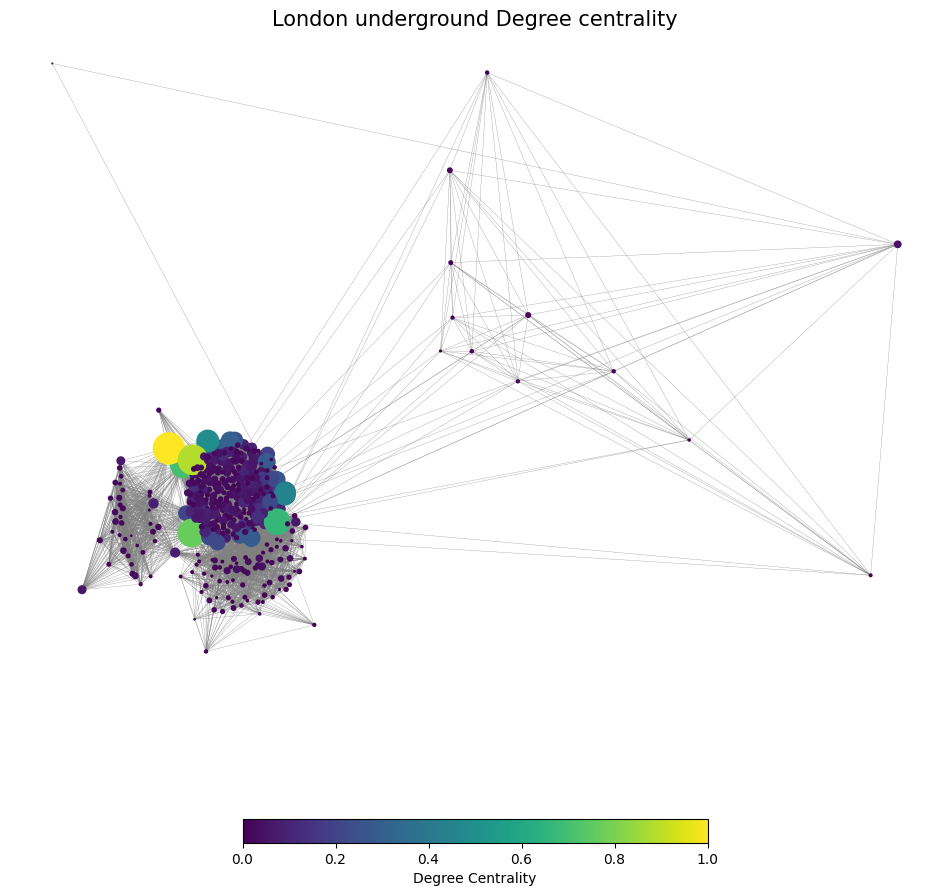

In [72]:
nodes = list(G1.nodes())
degree_values=[dc_g1[node] for node in nodes]

deg_color=[(dc_g1[node]/(max(degree_values))) for node in nodes]
deg_size=[(dc_g1[node]/(max(degree_values)))*500 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G1, pos1, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos1,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground Degree centrality",fontsize=15)
plt.show()

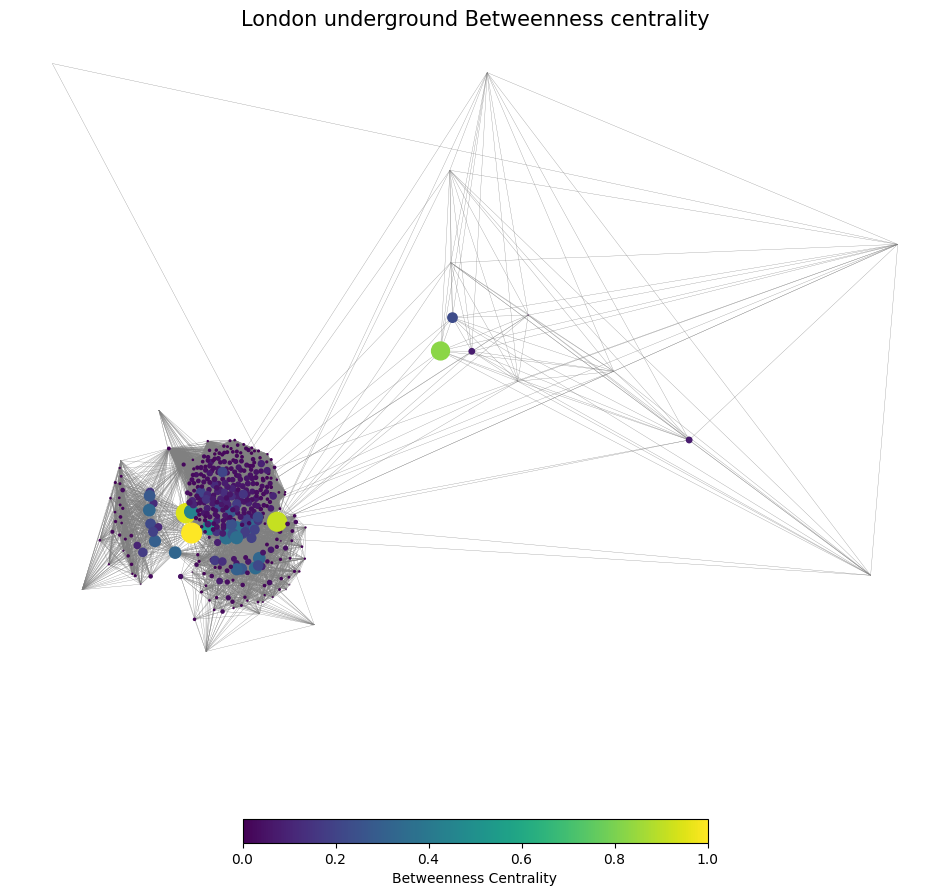

In [73]:
betweeness_values=[bc_g1[node] for node in nodes]

bc_color=[(bc_g1[node]/(max(betweeness_values))) for node in nodes]
bc_size=[(bc_g1[node]/(max(betweeness_values)))*200 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G1, pos1,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos1,
        node_color= bc_color,
        node_size= bc_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground Betweenness centrality",fontsize=15)
plt.show()

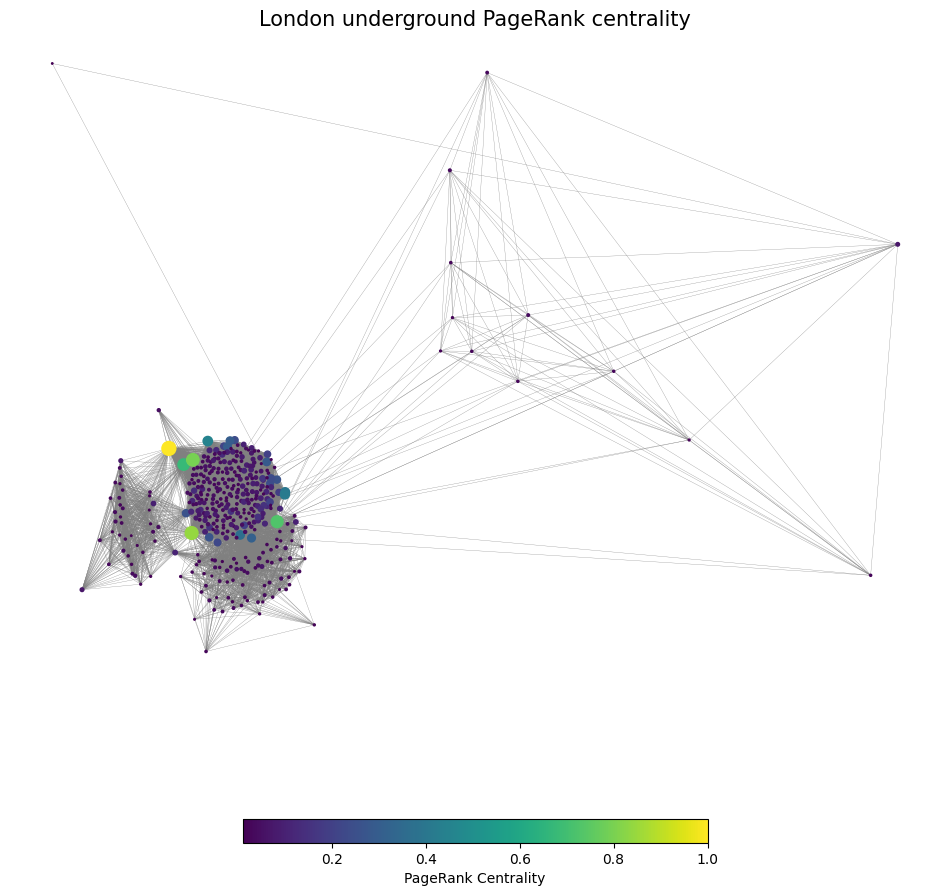

In [74]:
pagerank_values=[pr_g1[node] for node in nodes]

pr_color=[(pr_g1[node]/(max(pagerank_values))) for node in nodes]
pr_size=[(pr_g1[node]/(max(pagerank_values)))*100 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G1, pos1,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos1,
        node_color= pr_color,
        node_size= pr_size)

plt.colorbar(nod,label="PageRank Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground PageRank centrality",fontsize=15)
plt.show()

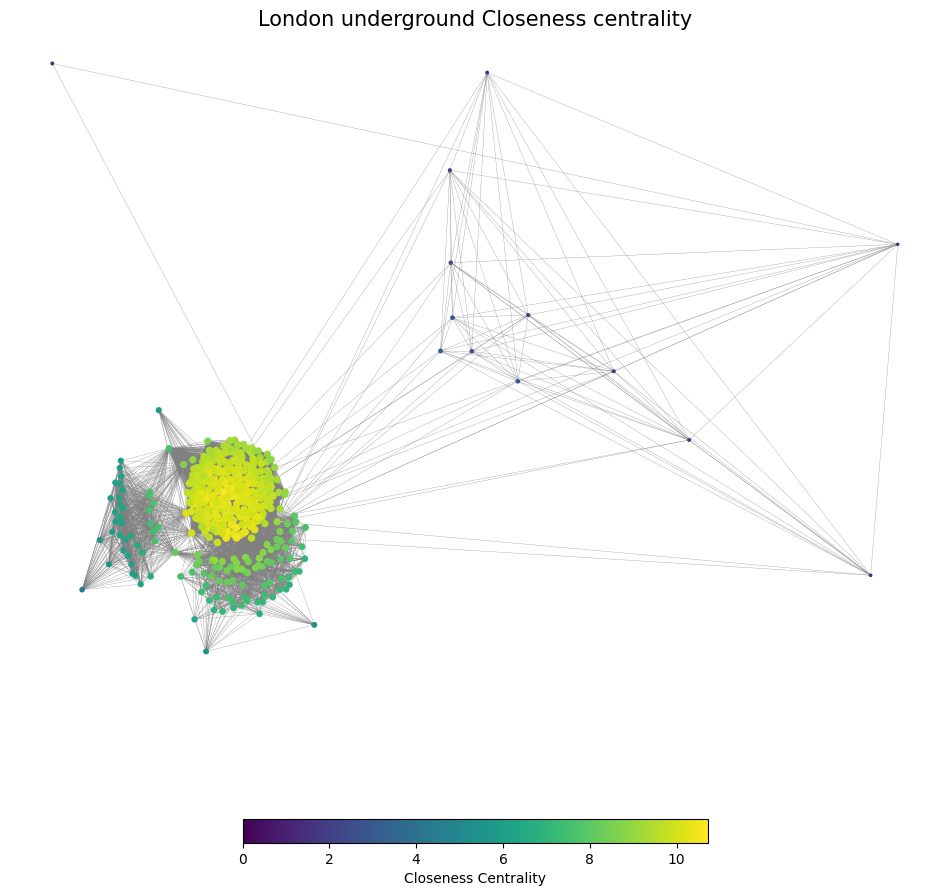

In [75]:
closeness_values=[pr_g1[node] for node in nodes]

cc_color=[(cc_g1[node]/(max(closeness_values))) for node in nodes]
cc_size=[(cc_g1[node]/(max(closeness_values)))*2 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G1, pos1,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos1,
        node_color= cc_color,
        node_size= cc_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground Closeness centrality",fontsize=15)
plt.show()

In [76]:
TOK_K = 10

for i in range(TOK_K):
    print("Degree centrality ranking {:3} is the  {:30} node, and the value is {}".format(i+1, dc_sort_g1[i][0], dc_sort_g1[i][1]))

Degree centrality ranking   1 is the  Bank and Monument              node, and the value is 75641.0
Degree centrality ranking   2 is the  Waterloo                       node, and the value is 67009.0
Degree centrality ranking   3 is the  Stratford                      node, and the value is 57936.0
Degree centrality ranking   4 is the  Canary Wharf                   node, and the value is 52936.0
Degree centrality ranking   5 is the  Liverpool Street               node, and the value is 50361.0
Degree centrality ranking   6 is the  Victoria                       node, and the value is 36938.0
Degree centrality ranking   7 is the  London Bridge                  node, and the value is 33819.0
Degree centrality ranking   8 is the  King's Cross St. Pancras       node, and the value is 31693.0
Degree centrality ranking   9 is the  Oxford Circus                  node, and the value is 24112.0
Degree centrality ranking  10 is the  Paddington                     node, and the value is 23281.0


In [77]:
for i in range(TOK_K):
    print("Betweenness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, bc_sort_g1[i][0], bc_sort_g1[i][1]))

Betweenness centrality ranking   1 is the Stratford                      node, and the value is 0.06549915342717698
Betweenness centrality ranking   2 is the Canning Town                   node, and the value is 0.062033802020297506
Betweenness centrality ranking   3 is the Liverpool Street               node, and the value is 0.05977917540587951
Betweenness centrality ranking   4 is the Shenfield                      node, and the value is 0.05410554029593813
Betweenness centrality ranking   5 is the West Hampstead                 node, and the value is 0.03353209461677769
Betweenness centrality ranking   6 is the West Ham                       node, and the value is 0.029211091653922067
Betweenness centrality ranking   7 is the Kew Gardens                    node, and the value is 0.024589120613756805
Betweenness centrality ranking   8 is the West Brompton                  node, and the value is 0.024284073490636004
Betweenness centrality ranking   9 is the Bethnal Green             

In [78]:
for i in range(TOK_K):
    print("PageRank centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, pr_sort_g1[i][0], pr_sort_g1[i][1]))

PageRank centrality ranking   1 is the Bank and Monument              node, and the value is 0.03788542410306165
PageRank centrality ranking   2 is the Stratford                      node, and the value is 0.031883028217307874
PageRank centrality ranking   3 is the Waterloo                       node, and the value is 0.030252091439695122
PageRank centrality ranking   4 is the Liverpool Street               node, and the value is 0.02749398298292188
PageRank centrality ranking   5 is the Canary Wharf                   node, and the value is 0.025596612498771737
PageRank centrality ranking   6 is the Victoria                       node, and the value is 0.017153259005725497
PageRank centrality ranking   7 is the London Bridge                  node, and the value is 0.015831414276634294
PageRank centrality ranking   8 is the King's Cross St. Pancras       node, and the value is 0.015058900418980779
PageRank centrality ranking   9 is the Canada Water                   node, and the value 

In [79]:
for i in range(TOK_K):
    print("Closeness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, cc_sort_g1[i][0], cc_sort_g1[i][1]))

Closeness centrality ranking   1 is the Heathrow Terminal 5            node, and the value is 0.4057776006707068
Closeness centrality ranking   2 is the Barking                        node, and the value is 0.4036988219787462
Closeness centrality ranking   3 is the Kew Gardens                    node, and the value is 0.4020510716849554
Closeness centrality ranking   4 is the Bounds Green                   node, and the value is 0.401232230398428
Closeness centrality ranking   5 is the Heathrow Terminal 4            node, and the value is 0.399604513439408
Closeness centrality ranking   6 is the Stonebridge Park               node, and the value is 0.39919964564463656
Closeness centrality ranking   7 is the West Brompton                  node, and the value is 0.39879559742029985
Closeness centrality ranking   8 is the Harrow & Wealdstone            node, and the value is 0.3967875631936116
Closeness centrality ranking   9 is the Bromley-by-Bow                 node, and the value is 0.

In [85]:
# 2.2 
# network efficiency
# average shorst path lenght
def cal_network_efficiency_apl(G,N):

    apl = 0
    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0,0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    path = nx.shortest_path(G, nodes[i], nodes[j])
                    t = 0
                    for k in range(len(path)-1):
                        weight = G.get_edge_data(path[k], path[k+1])['weight']
                        t += weight
                    e += 1/t
                    apl += t
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))
    APL = apl / (N*(N-1))

    return E, APL


In [86]:
# 2.3 

def att_node_second(G1,nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_con = []
    res_eff = []
    res_apl = []

    N = len(G.nodes())
    e0, apl = cal_network_efficiency_apl(G,N)
    res_eff.append(e0)

    res_apl.append(apl)

    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 


    for node in nodes_sort:

        G.remove_node(node)

        e, apl = cal_network_efficiency_apl(G,N)
        res_eff.append(e)
        res_apl.append(apl)

        n = cal_largest_connected_component(G, N)
        res_con.append(n) 

    return res_con,res_eff,res_apl



In [89]:
dc_sort_node_g2 = [k for k,v in dc_sort_g2]
bc_sort_node_g2 = [k for k,v in bc_sort_g2]
pr_sort_node_g2 = [k for k,v in pr_sort_g2]

dc_con_2, dc_eff_2, dc_apl_2 = att_node_second(G1, dc_sort_node_g2[:3])
bc_con_2, bc_eff_2, bc_apl_2 = att_node_second(G1, bc_sort_node_g2[:3])
pr_con_2, pr_eff_2, pr_apl_2 = att_node_second(G1, pr_sort_node_g2[:3])

In [90]:
dc_sort_node_g1 = [k for k,v in dc_sort_g1]
bc_sort_node_g1 = [k for k,v in bc_sort_g1]
pr_sort_node_g1 = [k for k,v in pr_sort_g1]

In [91]:
dc_con_g1, dc_eff_g1, dc_apl_g1 = att_node_second(G1, dc_sort_node_g1[:3])
bc_con_g1, bc_eff_g1, bc_apl_g1 = att_node_second(G1, bc_sort_node_g1[:3])
pr_con_g1, pr_eff_g1, pr_apl_g1 = att_node_second(G1, pr_sort_node_g1[:3])

In [92]:
def show_node_attack_compare(data1, data2, data3, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]
    x3 = [i for i in range(len(data3))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data1,label='Degree Centrality', marker='^')
    plt.plot(x2,data2,label='Betweenness Centrality', marker='<')
    plt.plot(x3,data3,label='PageRank Centrality', marker='>')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)

def show_node_attack_compare_2(data1, data2, data3, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]
    x3 = [i for i in range(len(data3))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data1,label='Degree Centrality', marker='^')
    plt.plot(x2,data2,label='Betweenness Centrality', marker='<')
    plt.plot(x3,data3,label='PageRank Centrality', marker='>')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)

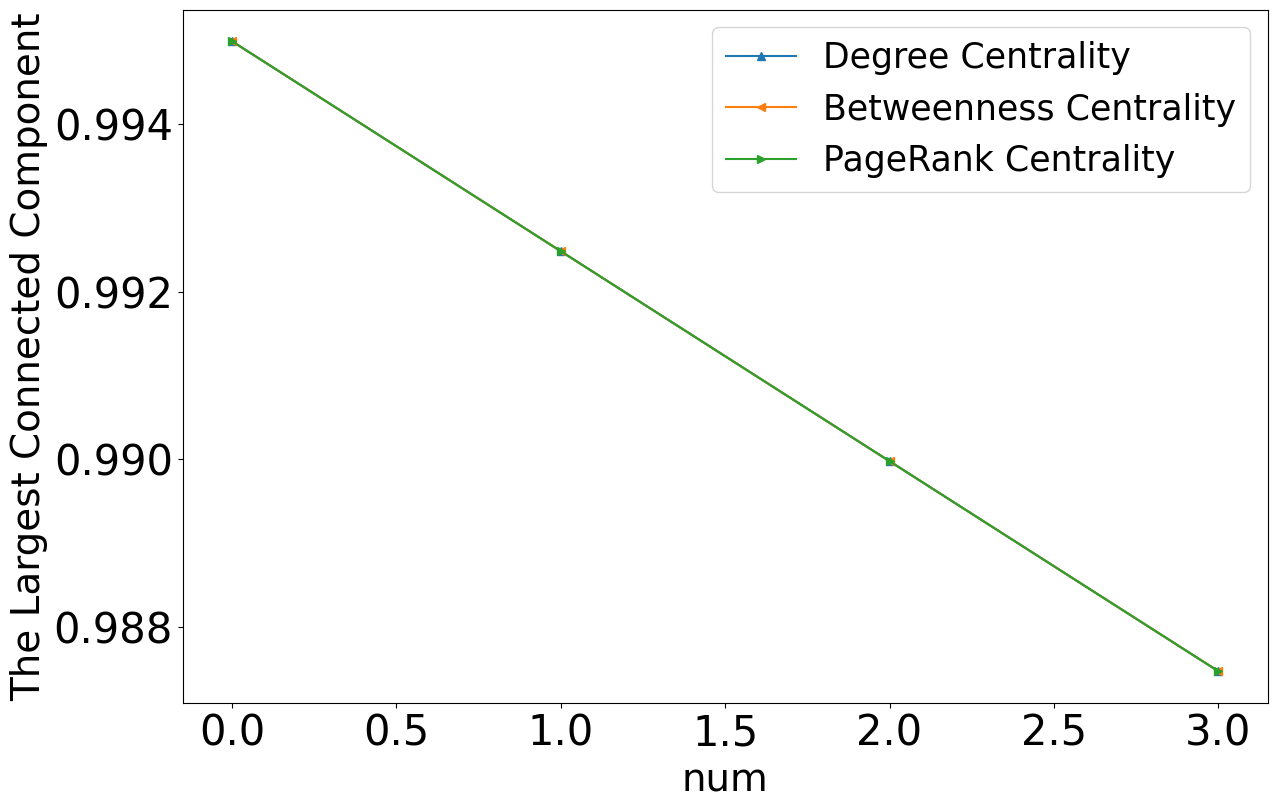

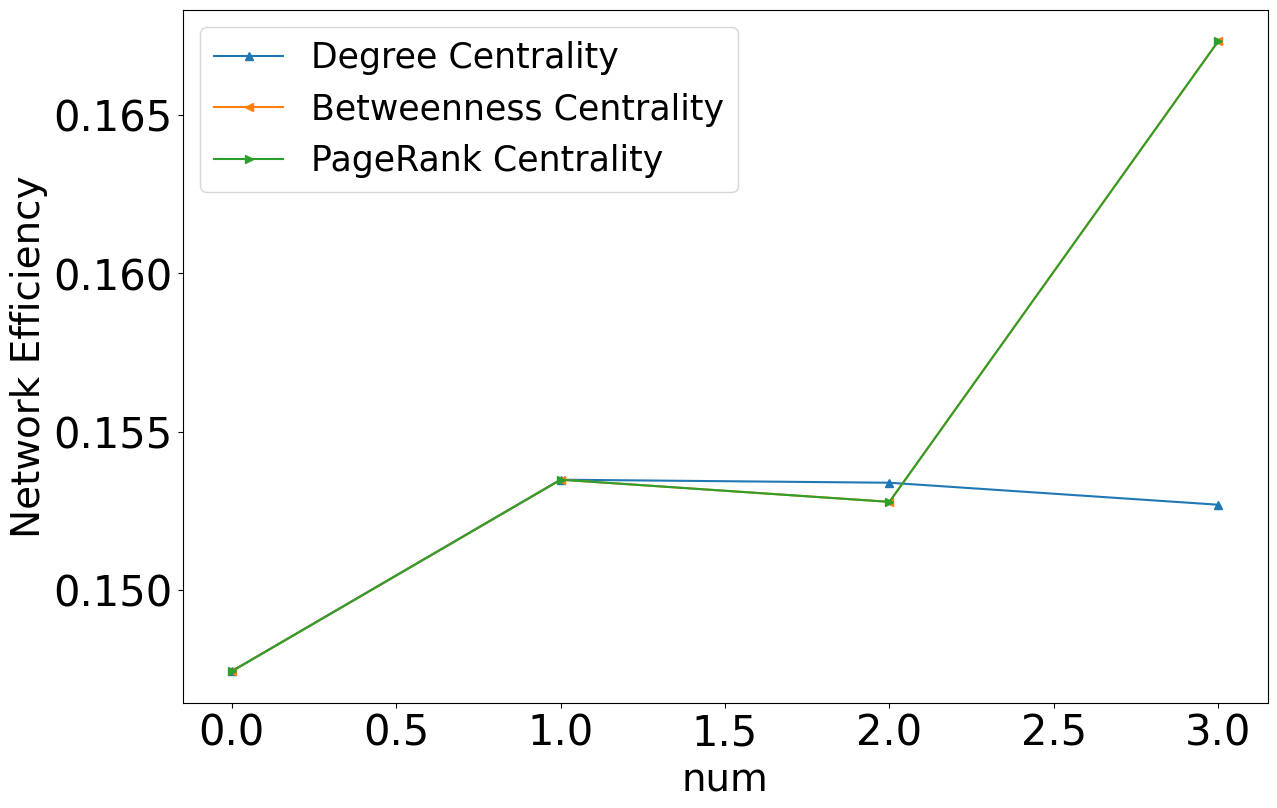

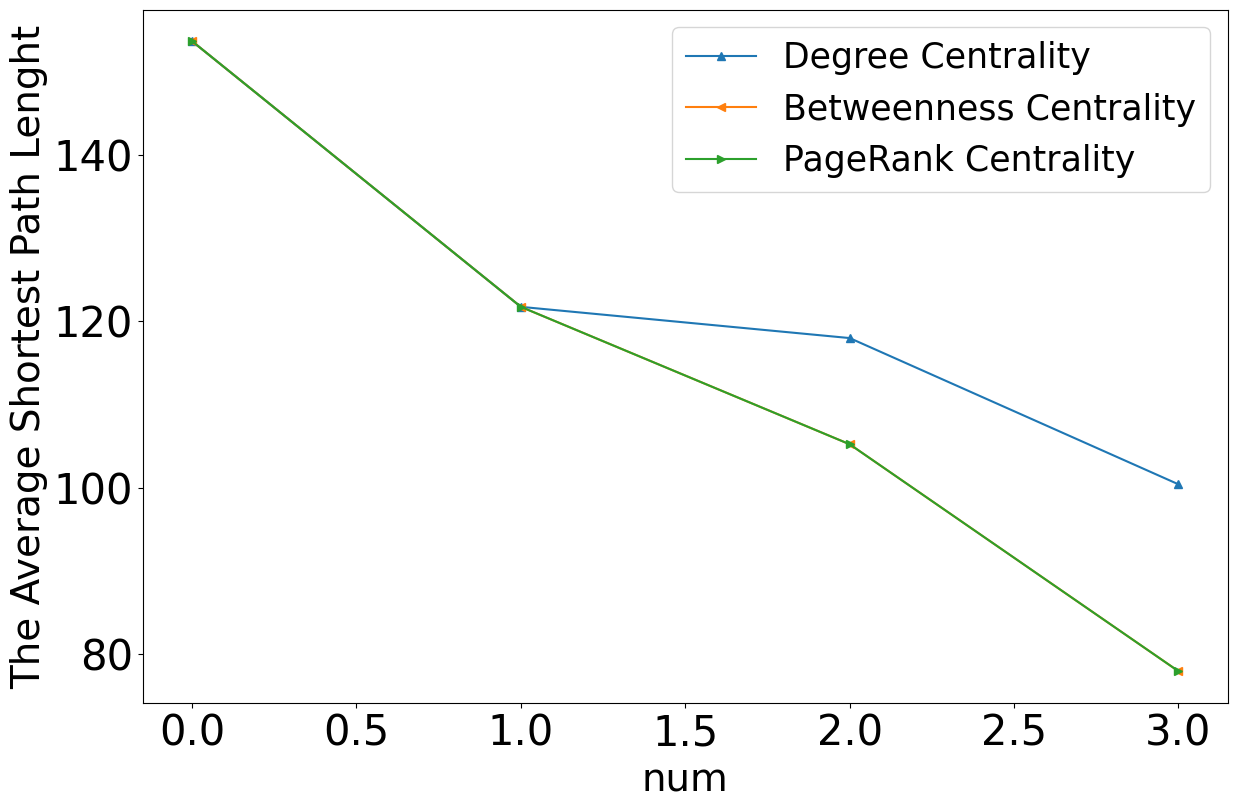

In [93]:
# unweight
show_node_attack_compare(dc_con_2, bc_con_2, pr_con_2, 'The Largest Connected Component', '003-The largest connected component.png')
show_node_attack_compare(dc_eff_2, bc_eff_2, pr_eff_2, 'Network Efficiency', '003-network efficiency.png')
show_node_attack_compare(dc_apl_2, bc_apl_2, pr_apl_2, 'The Average Shortest Path Lenght', '003-The Average Shortest Path Lenght.png')

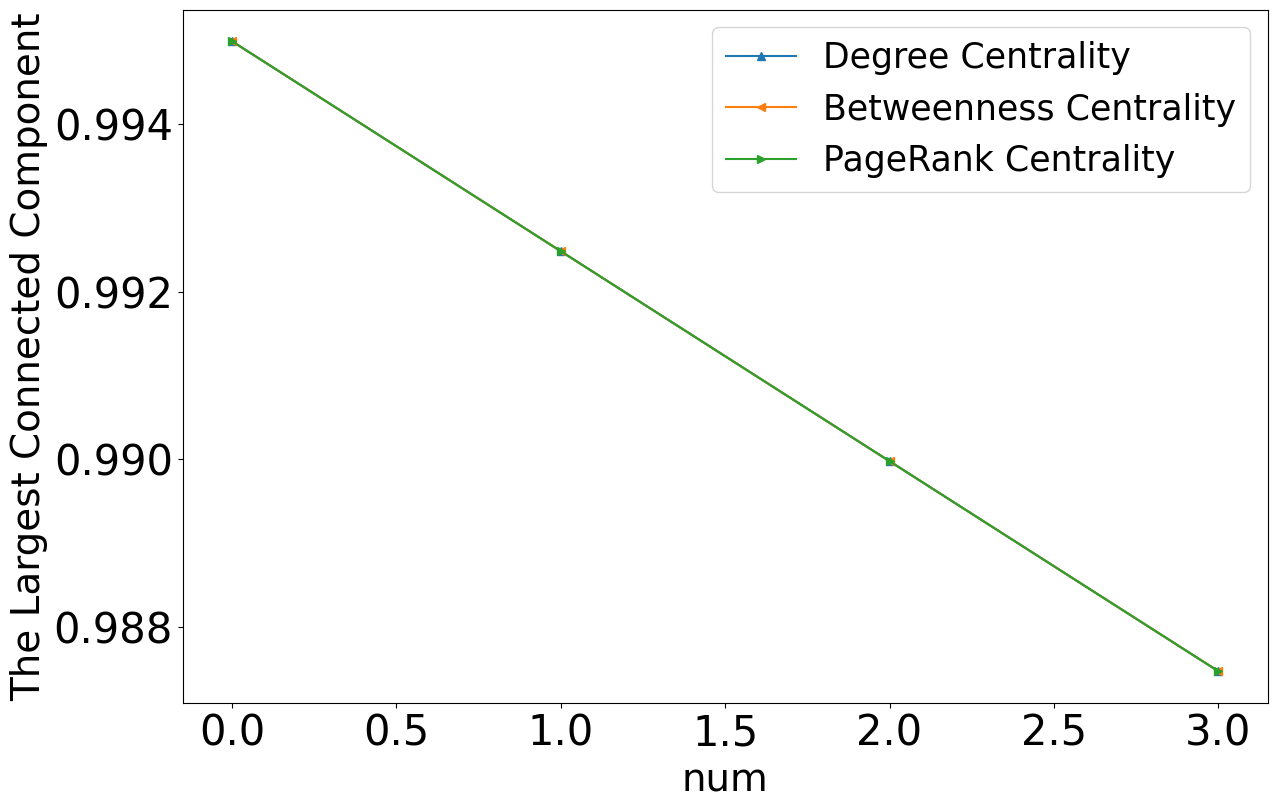

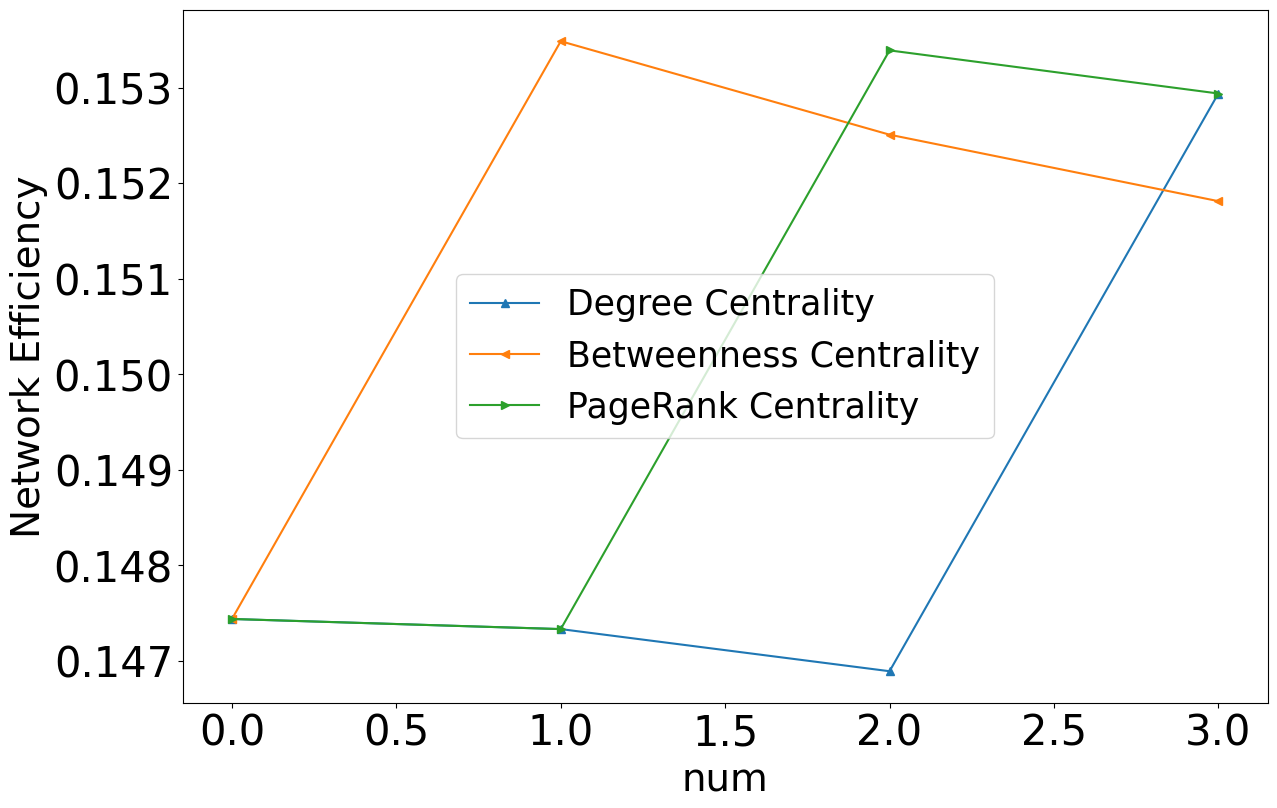

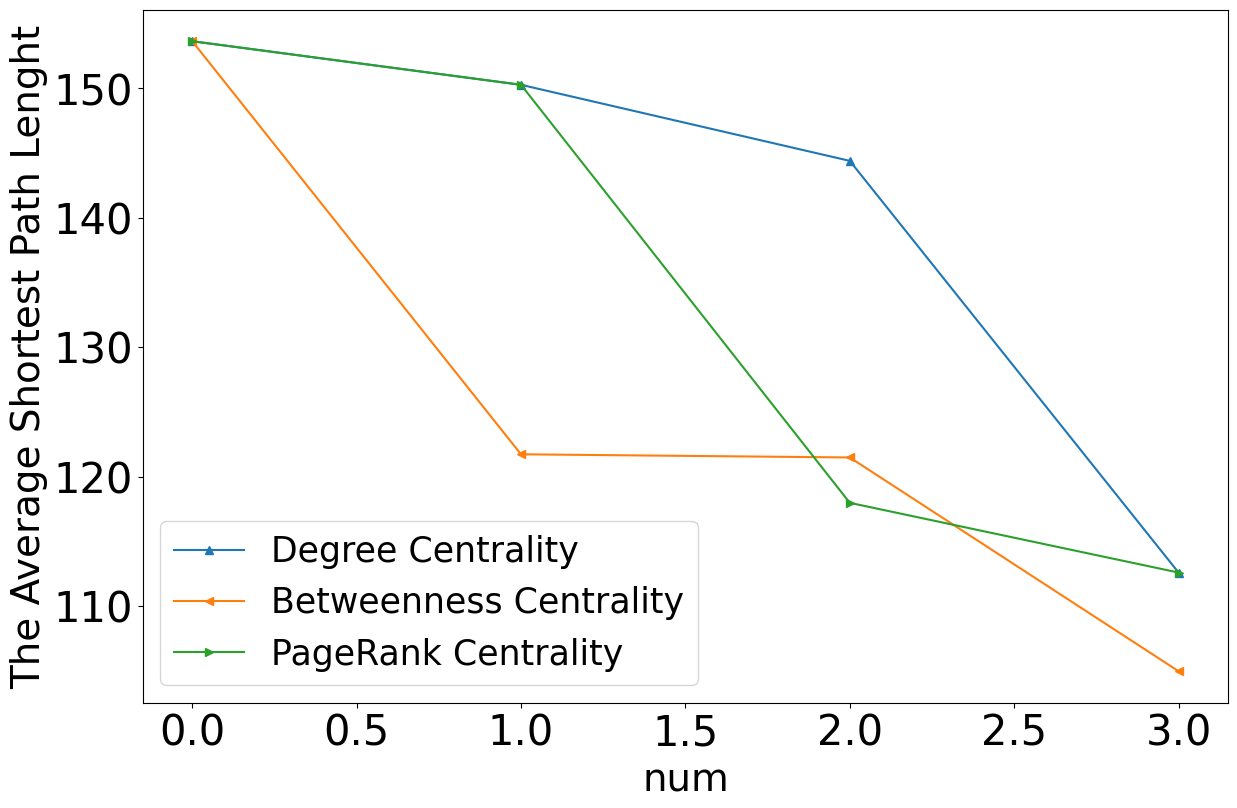

In [94]:
# weight
show_node_attack_compare_2(dc_con_g1, bc_con_g1, pr_con_g1, 'The Largest Connected Component', '004-The largest connected component.png')
show_node_attack_compare_2(dc_eff_g1, bc_eff_g1, pr_eff_g1, 'Network Efficiency', '004-network efficiency.png')
show_node_attack_compare_2(dc_apl_g1, bc_apl_g1, pr_apl_g1, 'The Average Shortest Path Lenght', '004-The Average Shortest Path Lenght.png')